In [22]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("../../model/yolo11x.pt")  # load a custom model
# image_path = "/home/fyp/Pictures/TestSeg/office1.jpg"
image_path="/home/fyp/Pictures/TestSeg/MessyTable.jpg"

In [23]:
results = model(image_path)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(1)
print(type(results))
print(len(results))



image 1/1 /home/fyp/Pictures/TestSeg/MessyTable.jpg: 608x640 1 handbag, 1 bottle, 28.1ms
Speed: 1.5ms preprocess, 28.1ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 640)
1
<class 'list'>
1


In [24]:
print(names)
print(xywh)

['bottle', 'handbag']
tensor([[1169.9479, 2018.1299,  490.0709,  677.1914],
        [2120.0449, 1021.0730, 2253.7388, 1083.5867]], device='cuda:0')


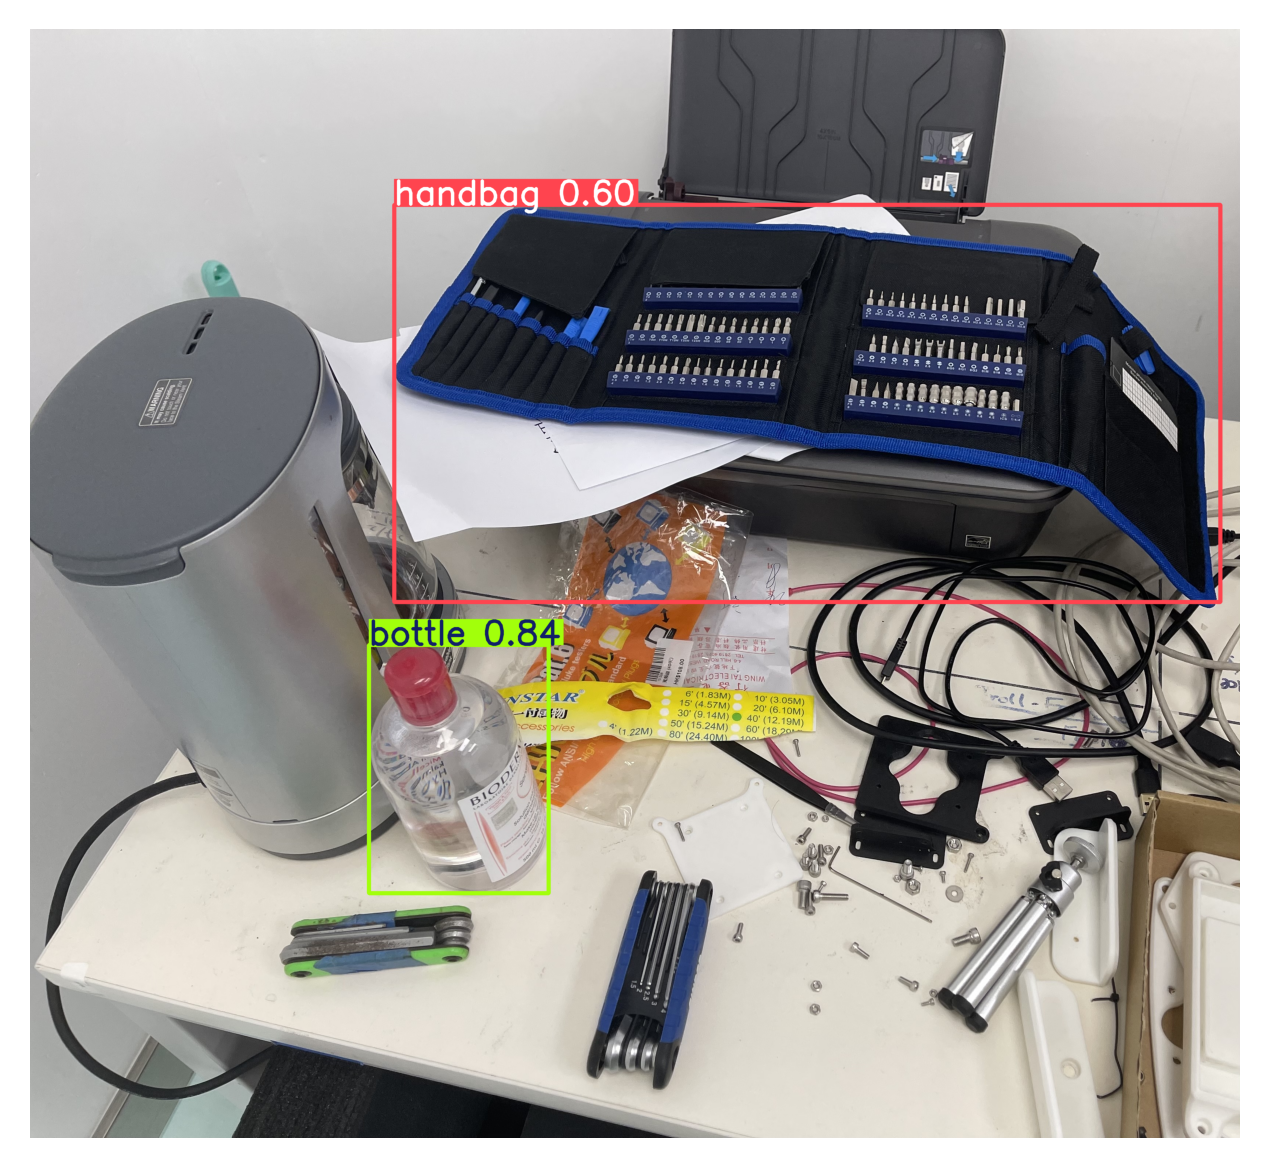

Image width: 3300, Image height: 3024


In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Draw the results on the image
annotated_image = results[0].plot()

# Convert the image to a format suitable for Matplotlib
annotated_image = Image.fromarray(annotated_image[..., ::-1])

# Display the image in the Jupyter Notebook
plt.rcParams['figure.dpi'] = 300
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
# Print the size of the annotated image
width, height = annotated_image.size
print(f"Image width: {width}, Image height: {height}")
